# This program determine magnetic field from the ABS and other connected magnetic fields.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#def ABC_Coil_CalculateB(zmin,zmax,x0,y0,B2,B4,B5,B6):
    #provide x,y and z, xand y = 0.55 and z is from 0 to 250
    #zmin,zmax,x0,y0,B2,B4,B5,B6;
zmin=0
zmax=250
x=0.55
y=0.55
zrange=zmax-zmin
z=np.arange(zmin,zmax,zrange/2500)

These are the parameters specified for ABS and other magnet systems.<br>
We will define a function with all these required input for more optimization.

In [13]:
#quadrupole and shim
z1=63.6;   dz1=0.53;    r1=0.75;                # center,roll-off,radius [cm]
zs=z1-5.25*2.54; zt=z1-.25*2.54; dzs=3.0;       # start,end,roll-off [cm]
B1= 7500; Bs=B1*0.30;                           # field [G]  (Bs=0: no shim)
vg=22000;
# small,large ring
z2=z1+7.0                      
r2=10;          
B2=35;
z3=z2;                          
r3=15;          
B3=-B2*pow((r2/r3),3)

# top,bot of MSR
za=z2+74.4;     zb=za+40.4;

# small,large costheta
z4=z2+8.4;      dz4=3.2;        r4=10;          B4=60;
z6=z2+60;       dz6=3.2;        r6=30;          B6=2.5;

#more parameters
z5=250;                         r5=1.9;         B5=0.03;
Bx5=z*0+B5;

Here, we used the parameter $Q_{xy}$ to obtain the magnetic field.<br>
$Q_{xy}=\frac{B1}{2\times r1}\times tanh(\frac{z-z1}{dz1}) + \frac{Bs}{2\times r1}\times (tanh(\frac{z-zs}{dzs})-tanh(\frac{z-zt}{dzs}))$

In [26]:
Qxy=B1/r1/2*(1-np.tanh((z-z1)/dz1)) + Bs/r1/2*(np.tanh((z-zs)/dzs)-np.tanh((z-zt)/dzs));
#plt.plot(z,np.log10(Qxy), 'k', linewidth=2);

Now, we obtain the derivative of $Q_{xy}$

In [25]:
dQxy=-B1/r1/2*pow((1/np.cosh((z-z1)/dz1)),2)/dz1 + Bs/r1/2*(pow((1/np.cosh((z-zs)/dzs)),2) - pow(1/np.cosh((z-zt)/dzs),2))/dzs
#plt.plot(z,dQxy, 'k', linewidth=2);

With this information we are in position to calculate magnetic field components and its derivative from each coils or magnet in ABS magnetic systems. 

In [16]:
Bz2=B2*pow(r2,3)/pow((pow(r2,2)+pow((z-z2),2)),(3/2));
Bz3=B3*pow(r3,3)/pow((pow(r3,2)+pow((z-z3),2)),(3/2));
dBz2=-3*Bz2*(z-z2)/(pow(r2,2)+pow((z-z2),2));         #dBz/dz
dBz3=-3*Bz3*(z-z3)/(pow(r3,2)+pow((z-z3),2));         #dBz/dz

In [17]:
Bx4=B4*pow(r4,5)/pow((pow((pow(r4,2)+pow((z-z4),2)),(3/2)) + pow((pow(r4,2)-pow(dz4,2)),(3/2))),(5/3));
Bx6=B6*pow(r6,5)/pow((pow((pow(r6,2)+pow((z-z6),2)),(3/2)) + pow((pow(r6,2)-pow(dz6,2)),(3/2))),(5/3));

In [18]:
dBx4=-5*Bx4/(pow((pow(r4,2)+pow((z-z4),2)),(3/2)) + pow((pow(r4,2)-pow(dz4,2)),(3/2)))*np.sqrt(pow(r4,2)+ pow((z-z4),2))*(z-z4);
dBx6=-5*Bx6/(pow((pow(r6,2)+pow((z-z6),2)),(3/2)) + pow((pow(r6,2)-pow(dz6,2)),(3/2)))*np.sqrt(pow(r6,2)+ pow((z-z6),2))*(z-z6);

Now we have all the required components of the magnetic fields.<br>
Finally, the total magnetic field can be obtained using the following expression.<br>
$B=(B_x,B_y,B_z)$ <br>
$B_x= (Q_{xy}\times y -\frac{1}{2}\times(dBz2+dBz3)\times x + Bx4 + Bx6 + B5$<br>
$B_y=Q_{xy}\times x -\frac{1}{2}\times(dBz2+dBz3)\times y$ <br>
$B_z=dQ_{xy}\times x \times y + Bz2+Bz3 + (dBx4+dBx6)\times x)$ <br>

In [19]:
Bx = Qxy*y - 1/2*(dBz2+dBz3)*x + Bx4 + Bx6 + B5;
By = Qxy*x - 1/2*(dBz2+dBz3)*y;
Bz = dQxy*x*y + (Bz2+Bz3) + (dBx4+dBx6)*x;

[ 3.54510478e-03  3.56948894e-03  3.59407367e-03 ... -1.09329490e-05
 -1.08197872e-05 -1.07074059e-05]


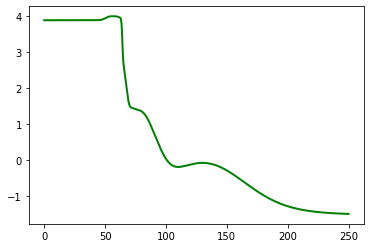

In [24]:
B  = [Bx,By,Bz];
Bt=np.linalg.norm(B,axis=0);
#plt.plot(z,np.log10(Bx), 'k', linewidth=2);
#plt.plot(z,np.log10(By), 'b', linewidth=2);
#plt.plot(z,np.log10(Bz), 'r', linewidth=2);
plt.plot(z,np.log10(Bt), 'g', linewidth=2);